# Introduction

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


import pandas as pd 


drive.mount(ROOT)
%cd '{REPO_PATH}'

In [ ]:
repo_name = 'politicalbias'
GIT_REPO = 'https://github.com/thekhan314/politicalbias.git'


from os.path import join
from google.colab import drive

BASE = 'My Drive/Colab Notebooks/'
ROOT = '/content/drive/'
PROJECT_PATH = join(ROOT,BASE)
REPO_PATH = join(PROJECT_PATH,repo_name)

drive.mount(ROOT)
%cd '{REPO_PATH}'

# Imports

In [1]:
from datashop_classes import *

import pandas as pd
import numpy as np
import scipy as sp
import json

import random
random.seed(11)
import math
from matplotlib import cycler
import matplotlib.pyplot as plt
#import textdistance
import matplotlib as mpl


import os
import glob

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

import nltk
from nltk import word_tokenize
nltk.download('punkt')
from sklearn.feature_extraction import text as sk_text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

df_adf = pd.read_csv('data/adfontes_political_bias.csv')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\umark\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## IBC Data

Pulled from 
Columns:


In [ ]:
df_ibc = pd.read_csv('data/IBC_data_2_labels.csv')
df_ibc.info()
#df_ibc['Label'].hist()

## Political Bias (Antaripa)

In [ ]:
df_ant = pd.read_csv('data/political_bias_summarized_binary_levels.csv')
df_ant.head()
df_ant.info()

In [ ]:
# Fit a baseline model, pull weights, cluster somehow and find most common hate words

# Adfontes

https://medium.com/analytics-vidhya/mlforsocial-predicting-media-bias-8e94d03befb5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3707 entries, 0 to 3706
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   article_title  3707 non-null   object 
 1   article_bias   3707 non-null   float64
 2   reliability    3707 non-null   float64
 3   article_url    3707 non-null   object 
 4   article_text   3707 non-null   object 
 5   length         3707 non-null   int64  
 6   bias           3707 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 202.9+ KB


<AxesSubplot:>

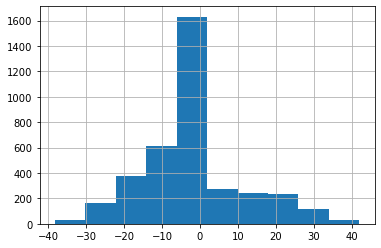

In [4]:
df_adf = pd.read_csv('data/adfontes_political_bias.csv')
df_adf.head()
df_adf.info()
df_adf.describe()
df_adf['article_bias'].hist()

In [5]:
df_left = df_adf[df_adf['article_bias'] < -13]
df_right = df_adf[df_adf['article_bias'] > 10]

df_left.info()
df_right.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 137 to 3706
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   article_title  617 non-null    object 
 1   article_bias   617 non-null    float64
 2   reliability    617 non-null    float64
 3   article_url    617 non-null    object 
 4   article_text   617 non-null    object 
 5   length         617 non-null    int64  
 6   bias           617 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 38.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 42 to 3692
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   article_title  620 non-null    object 
 1   article_bias   620 non-null    float64
 2   reliability    620 non-null    float64
 3   article_url    620 non-null    object 
 4   article_text   620 non-null    object 
 5   length         

In [6]:
def word_counts(df_main,col, stopwords='english',show_chart = True):
    countvec = CountVectorizer(stop_words=stopwords)
    df_wordcounts= countvec.fit_transform(df_main[col])

    words = countvec.get_feature_names()
    sums = df_wordcounts.toarray().sum(axis=0)
    count_dict = dict(zip(words,sums))

    count_series = pd.Series(count_dict)
    count_series.sort_values(ascending = False,inplace=True)

    if show_chart == True:
        plot_wordcounts(count_series)

    return count_series

def plot_wordcounts(series,cap = 30):
    top_30 = series.head(30)

    fig,ax = plt.subplots(figsize=(30,20))

    ax.tick_params(
        axis='x', 
        labelrotation=35,
        length=10,
        labelsize= 26
        )

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(False)

    ax.bar(list(top_30.index),top_30)

    fig.tight_layout()

    fig.show()

    

<ipython-input-6-03f97733d1ad>:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


26562

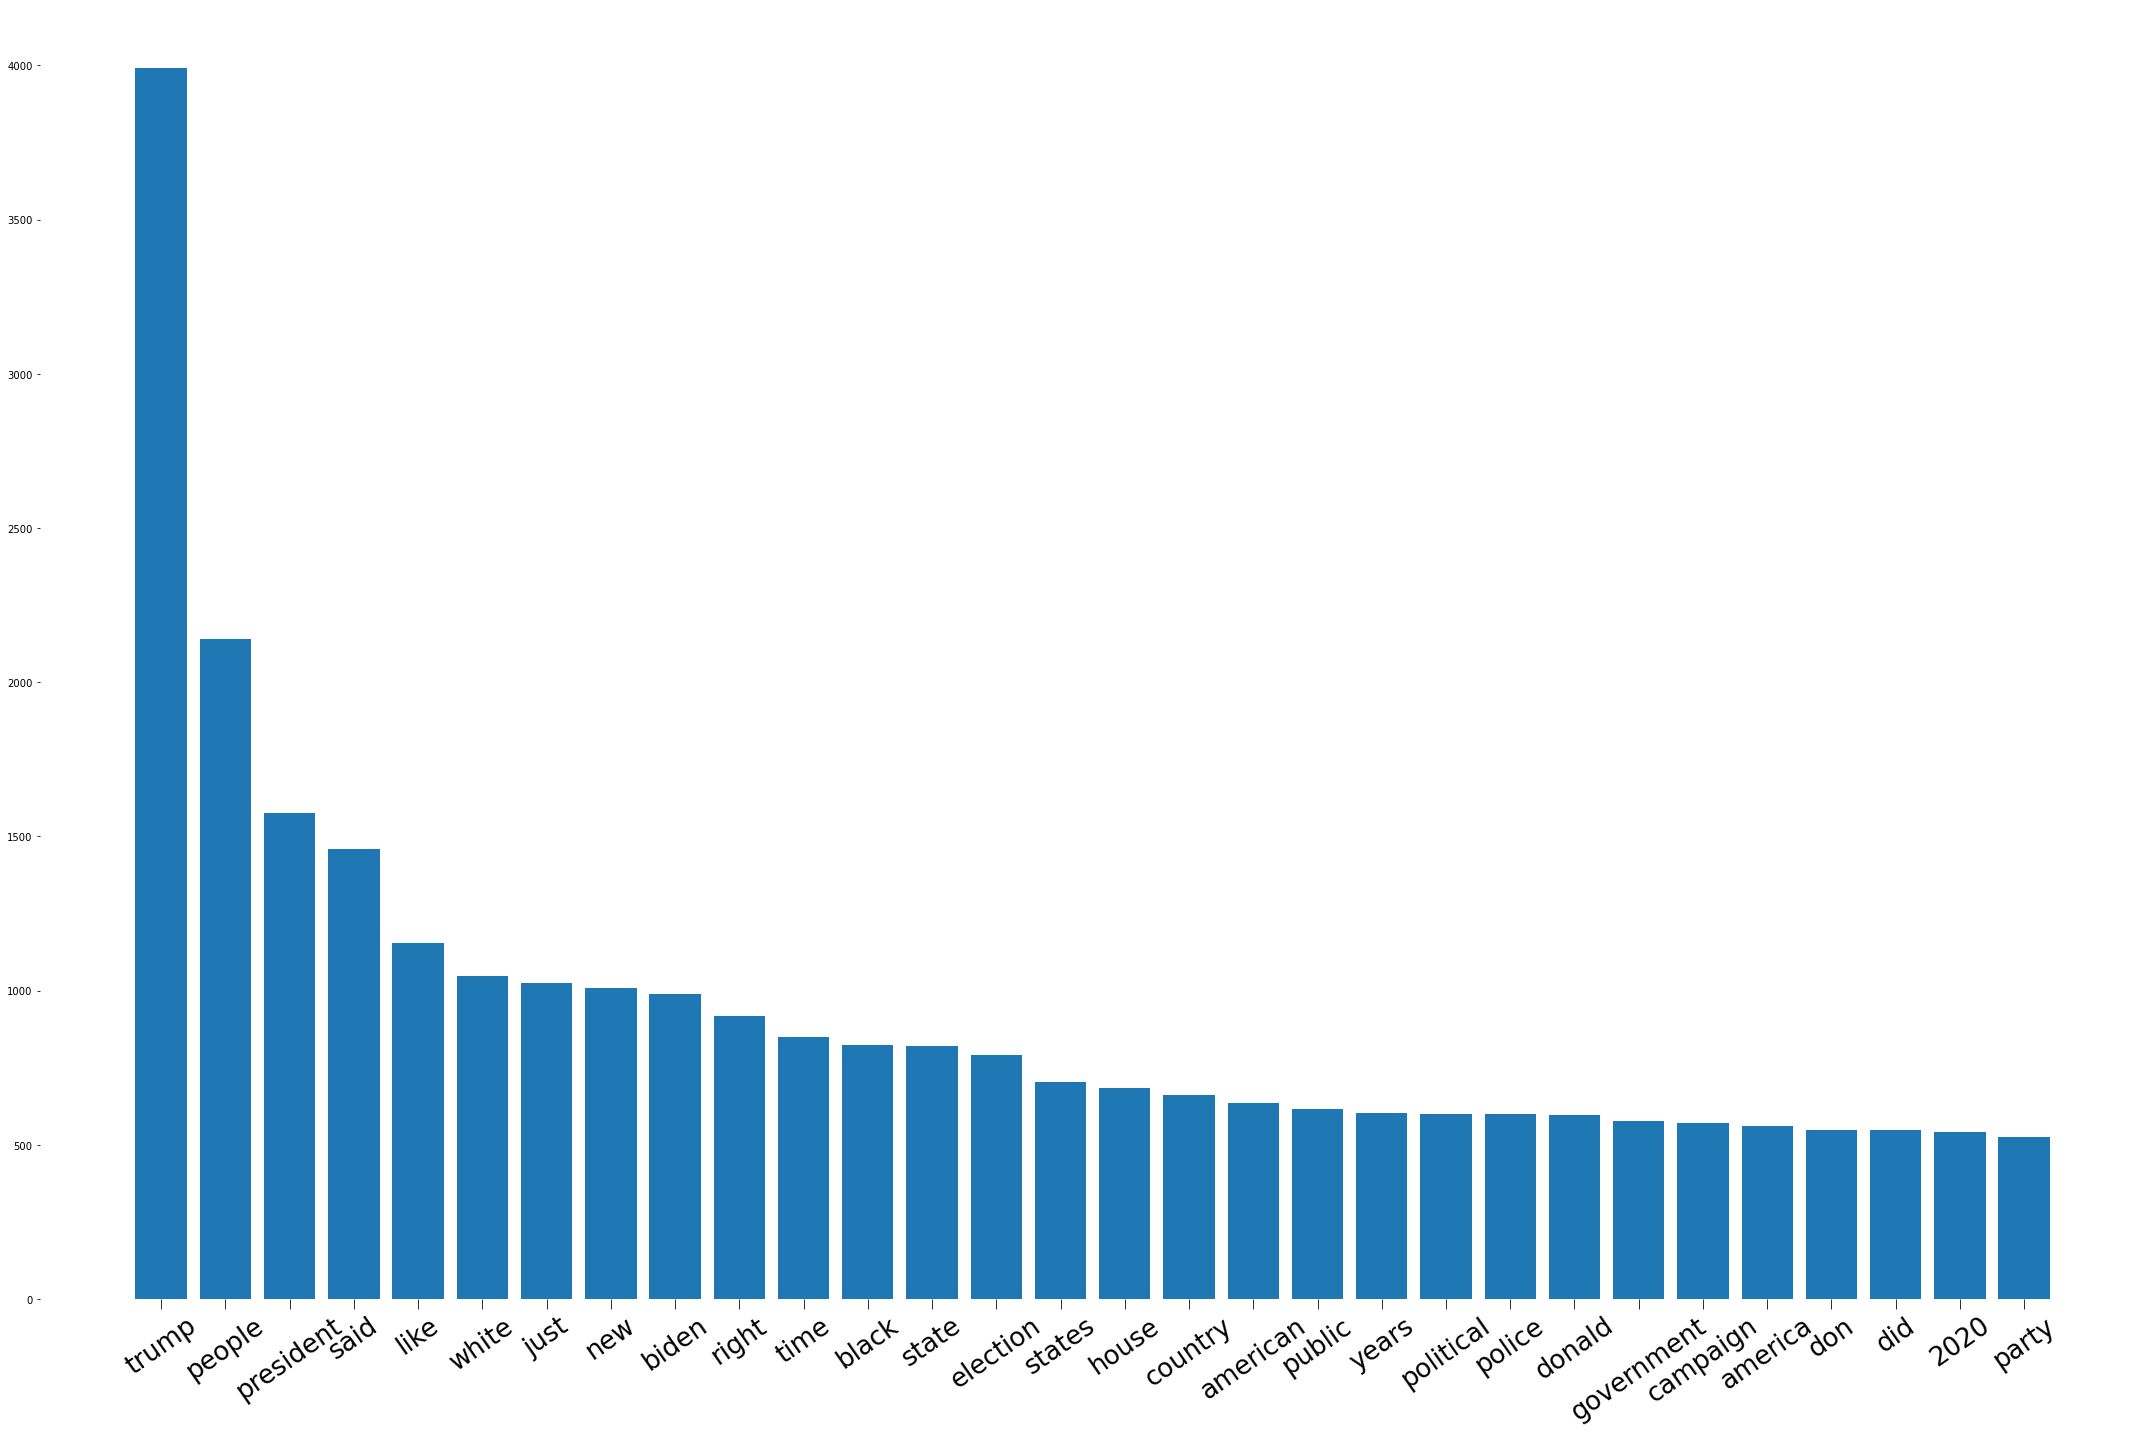

In [7]:
left_counts = word_counts(df_left,'article_text')
len(left_counts)

<ipython-input-6-03f97733d1ad>:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


24466

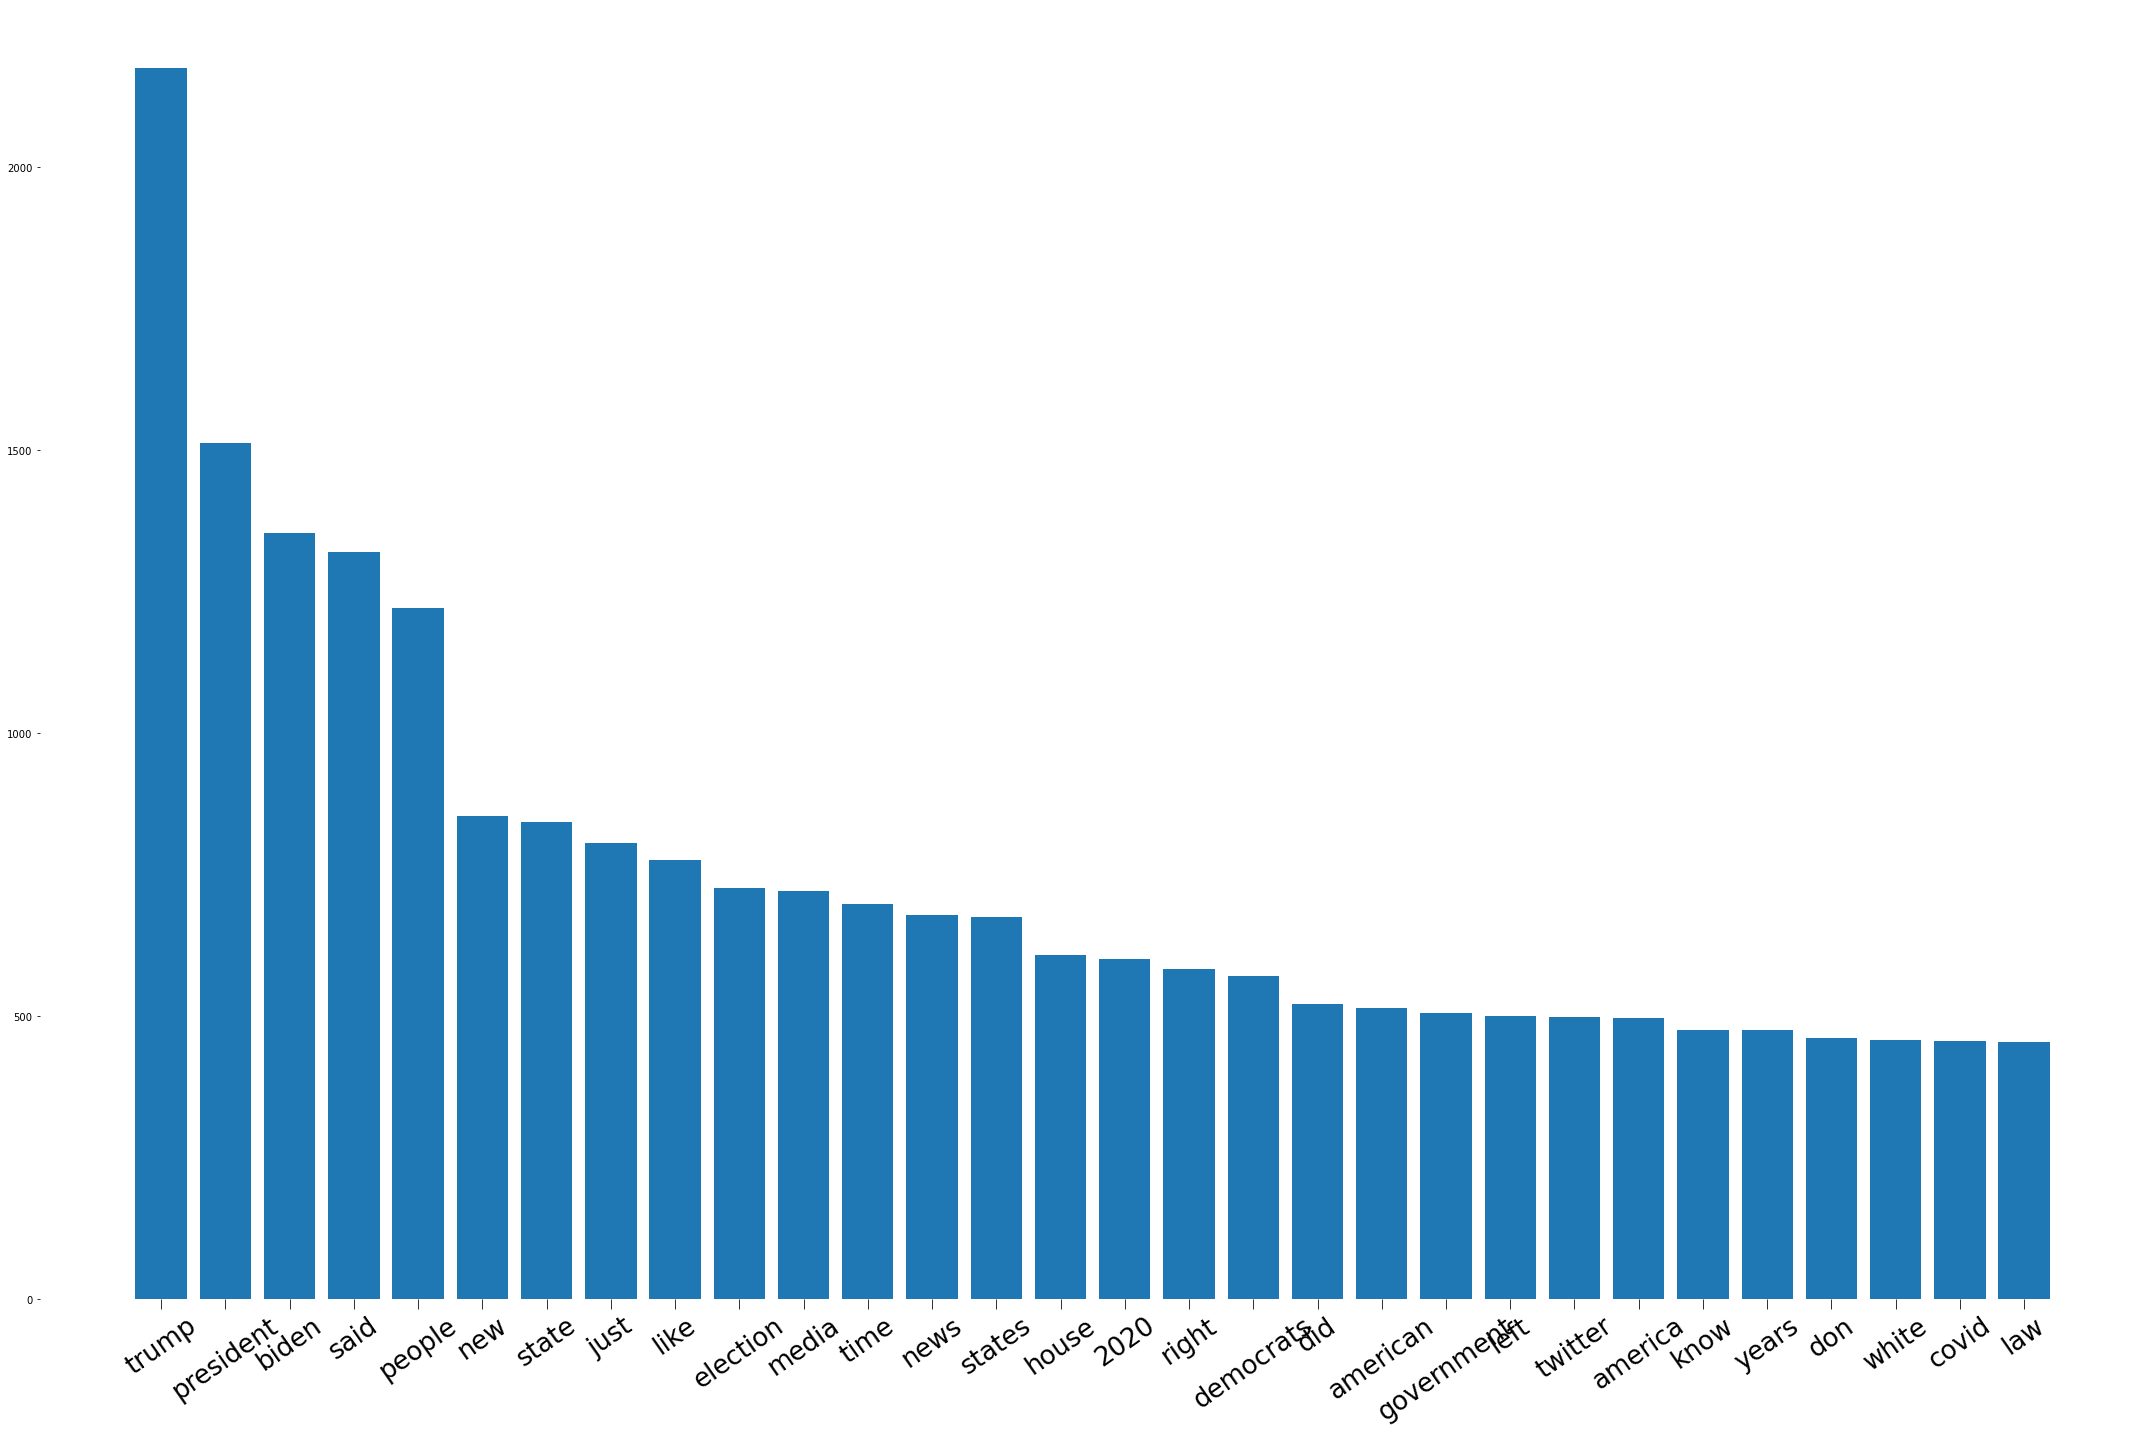

In [8]:
right_counts = word_counts(df_right,'article_text')
len(right_counts)

In [9]:

# find least common words
# predict bias - get weights

In [10]:
def compare_vocabs(seta,setb):
    left_words = set(seta.index)
    right_words = set(setb.index)

    left_notin_right = list(left_words - right_words)
    sr_right_notin_left = seta[left_notin_right]
    sr_right_notin_left.sort_values(ascending=False,inplace=True)
    plot_wordcounts(sr_right_notin_left)

In [ ]:
compare_vocabs(left_counts,right_counts)

In [ ]:
compare_vocabs(right_counts,left_counts)

In [ ]:
#more context around word occurences? a function that pulls context 
#LDA? 

# Modeling 

## Linear Regression

In [2]:
df_adf_1 = df_adf[['article_text','article_bias']]
df_tmod = TopicModel(df_adf_1,'article_text',stop_words='english', n_topics=30,desparsify=True)


C:\Users\umark\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\umark\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [3]:
X = df_tmod.vector_df.drop(['article_bias','article_text'],axis=1)
y = df_tmod.data['article_bias']
X.loc[:,'mod_number']

0        9.0
1        7.0
2       27.0
3       13.0
4        3.0
        ... 
3702     NaN
3703     NaN
3704     NaN
3705     NaN
3706     NaN
Name: mod_number, Length: 7414, dtype: float64

In [ ]:
df_tmod.vector_df

In [ ]:
from sklearn.preprocessing import OneHotEncoder

topic_encoder = OneHotEncoder(sparse=False)
df_encoded = topic_encoder.fit_transform(X[''])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=42)

In [ ]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)



In [ ]:
print(len(predictions))

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,predictions,squared=False))

In [ ]:
df_test = pd.concat([X_test,y_test])

In [ ]:
df_test